In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
m = 14             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -5            # valor mínimo de x
b = 5             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 100 # número de generaciones
target = 0         # objetivo de minimización 

In [72]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [73]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[1 0 0 ... 0 0 1]
 [1 0 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [1 1 1 ... 0 1 0]]


In [74]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [75]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [76]:
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [77]:
def eva_funcion(ind, a, b, m, decimales):
    x,y = deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [78]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1]
Fenotipo: [ 1.045 -3.93 ]
Evaluación f(x): 281.54775411062496

Individuo 2:
Genotipo: [1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1]
Fenotipo: [ 1.343 -3.453]
Evaluación f(x): 199.27145595288198

Individuo 3:
Genotipo: [0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0]
Fenotipo: [-4.489 -1.86 ]
Evaluación f(x): 117.63170979664099

Individuo 4:
Genotipo: [1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0]
Fenotipo: [ 3.8   -4.622]
Evaluación f(x): 331.287479197456

Individuo 5:
Genotipo: [1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0]
Fenotipo: [ 0.874 -2.135]
Evaluación f(x): 155.502627474001

Individuo 6:
Genotipo: [1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
Fenotipo: [ 3.649 -3.281]
Evaluación f(x): 55.89958541792201

Individuo 7:
Genotipo: [1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1]
Fenotipo: [2.952 0.591]
Evaluación f(x): 16.552516773377

I

In [79]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [80]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [81]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

Generación 1 - Mejor evaluación: 1.699
Generación 2 - Mejor evaluación: 1.171
Generación 3 - Mejor evaluación: 0.432
Generación 4 - Mejor evaluación: 0.358
Generación 5 - Mejor evaluación: 0.139
Generación 6 - Mejor evaluación: 0.279
Generación 7 - Mejor evaluación: 0.105
Generación 8 - Mejor evaluación: 0.007
Generación 9 - Mejor evaluación: 0.105
Generación 10 - Mejor evaluación: 0.219
Generación 11 - Mejor evaluación: 0.219
Generación 12 - Mejor evaluación: 0.168
Generación 13 - Mejor evaluación: 0.128
Generación 14 - Mejor evaluación: 0.018
Generación 15 - Mejor evaluación: 0.02
Generación 16 - Mejor evaluación: 0.009
Generación 17 - Mejor evaluación: 0.081
Generación 18 - Mejor evaluación: 0.265
Generación 19 - Mejor evaluación: 0.352
Generación 20 - Mejor evaluación: 0.704
Generación 21 - Mejor evaluación: 0.375
Generación 22 - Mejor evaluación: 0.295
Generación 23 - Mejor evaluación: 0.276
Generación 24 - Mejor evaluación: 0.057
Generación 25 - Mejor evaluación: 0.232
Generación

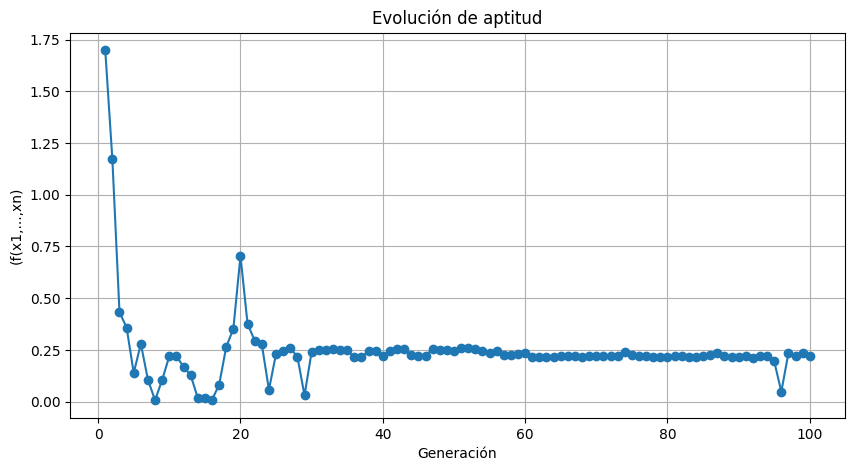

In [82]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target=0):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf #cota maxima
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break
        
        # nueva población
        new_pob = []
        while len(new_pob) < pob_size:
            
            padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
            padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
            
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
